In [2]:
#!pip install rdkit

Looking in links: /usr/share/pip-wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.4 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 34.5 MB/s eta 0:00:000:00:01


#### In **RDKit** most of the basic functionality, that is related to the work with the molecules is being on the `rdkit.Chem` module

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

#### In **CGRTools** functionality for reading of files and strings in located at `CGRtools.files` module

In [3]:
from CGRtools.files import SMILESRead, SDFRead, SDFWrite, RDFRead, RDFWrite, INCHIRead
from CGRtools.utils import from_rdkit_molecule, to_rdkit_molecule
from CGRtools import smiles, inchi
from io import StringIO, BytesIO

#### ***Reading one molecule from SMILES***

In [7]:
#RDKit
m_rdkit = Chem.MolFromSmiles('Cc1ccccc1')
#CGRtools
m_cgrt = smiles('Cc1ccccc1')
m_cgrt.clean2d() #CGRTools does not calculate 2D coordinates for SMILES. It has to be done explicitly

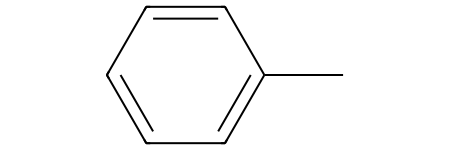

In [8]:
m_rdkit

In [11]:
m_cgrt

#### ***Reading one molecule from MOL file***

In [14]:
#RDKit 
m_rdkit = Chem.MolFromMolFile('styrene.mol')
#CGRTools
m_cgrt = next(SDFRead('styrene.mol'))

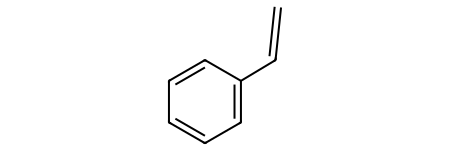

In [16]:
m_rdkit

In [18]:
m_cgrt

#### ***Reading one molecule from MOL string***

In [45]:
string_with_mol_data = open('styrene.mol', 'r').read()
#RDKit
m_rdkit = Chem.MolFromMolBlock(string_with_mol_data)
#CGRTools
m_cgrt = next(SDFRead(StringIO(string_with_mol_data)))

#### ***Reading one molecule from InChi***

In [50]:
#RDKit
m_rdkit = Chem.MolFromInchi('InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-13)17-18(21)14-9-5-6-10-16(14)23-19(17)22/h2-10,15,21H,11H2,1H3')
#CGRtools
m_cgrt = inchi('InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-13)17-18(21)14-9-5-6-10-16(14)23-19(17)22/h2-10,15,21H,11H2,1H3')
m_cgrt.clean2d() #CGRTools does not calculate 2D coordinates from InChi automatically

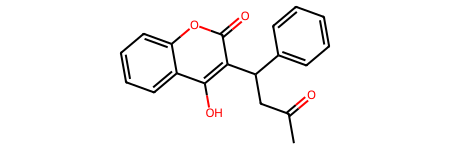

In [52]:
m_rdkit

In [56]:
m_cgrt #probably note on the GitHub that drawing is odd, but only sometimes! This time is seems correct

#### ***Reading set of the molecules from SDF***

#RDKit 

for m in Chem.SDMolSupplier('data/input.sdf'): 
    if m is None: continue
    ...
    
#CGRtools
for m in SDFRead('data/input.sdf'):
    ...

For molecules with errors, **RDKit** returns `None`, while **CGRTools** simply skips the molecule. Therefore, it is important to check that data is read correctly.

#### ***Reading set of molecules, represented as SMILES, from the .txt file***

#### ***Writing several molecules in SDF***

SDF format is the most convenient way of storing of structural information using files. Unlike SMILES, SDF contains coordinates of atoms in space, what allows for complicated molecules to pick up manually most representative image for presenting the molecule. Moreover, there is no need to recalculate coordinates every time, what is computationally costly.

#### ***Using RDKit and CGRTools together***
##### Objects for storage are different for RDKit and CGRtools, but they could be converted into another

In [34]:
#Converting CGRTools to RDKit
m_cgrt = smiles('Cc1ccccc1') #m = next(SMILESRead('data/input.txt'))
m_rdkit = to_rdkit_molecule(m_cgrt)
#Calculate 2D in RDKit
AllChem.Compute2DCoords(m_rdkit)
#Covert back to CGRTools
m_cgrt_from_rdkit = from_rdkit_molecule(m_rdkit)